# Regression Problem: House Sales in King County, USA

King County is located in the U.S. state of Washington and is one of the most populous counties in the country. It encompasses a diverse range of landscapes, including urban areas, suburban neighborhoods, rural communities, and vast natural reserves. At its core is the city of Seattle, one of the major economic and cultural hubs of the Pacific Northwest.

The dataset contains house sale prices for King County. It includes homes sold between May 2014 and May 2015. Our task is to predict the price of house given it's attibutes.

### Data column defination - 

**id** - Unique ID for each home sold<br>
**date** - Date of the home sale<br>
**price** - Price of each home sold (scale = 1e5. For eg - 1.2 means $120000)<br>
**bedrooms** - Number of bedrooms<br>
**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower<br>
**sqft_living** - Square footage of the apartments interior living space<br>
**sqft_lot** - Square footage of the land space<br>
**floors** - Number of floors<br>
**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not<br>
**view** - An index from 0 to 4 of how good the view of the property was<br>
**condition** - An index from 1 to 5 on the condition of the apartment<br>
**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design<br>
**sqft_above** - The square footage of the interior housing space that is above ground level<br>
**sqft_basement** - The square footage of the interior housing space that is below ground level<br>
**yr_built** - The year the house was initially built<br>
**yr_renovated** - The year of the house’s last renovation<br>
**zipcode** - What zipcode area the house is in<br>
**lat** - Lattitude<br>
**long** - Longitude<br>
**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors<br>
**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors<br>

## Load Dataset

In [1]:
import pandas as pd

train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('test.csv')

## Data Analysis 

Explore the data to find any relationship between the target variable and the input variables. 

Start with providing some descriptive statistics of the data with visualizations. 

Are there any missing values? Are there any outliers? What is the relationship between the input variables and the target variable. Show some statistical plots to get some insights about the relationship between data attributes and the data attibutes with the label. 

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataset/train.csv')

# Display the first few rows
df.head()



,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2254502445,20140530T000000,3,1.00,1220.0,4800,1.0,0,0.0,3,...,1220,0,1901,0,98122,47.6101,-122.307,1200,4800,3.85
1,126059019,20150316T000000,4,2.50,3170.0,94855,1.0,0,0.0,4,...,1910,1260,1978,0,98072,47.7648,-122.112,2590,65340,7.99
2,8825900020,20140811T000000,5,3.00,2710.0,4200,2.0,0,0.0,3,...,1890,820,1919,2014,98115,47.6754,-122.307,2150,4200,9.25
3,9465910380,20141024T000000,4,2.25,2850.0,7453,2.0,0,NaN,3,...,2850,0,1991,0,98072,47.7439,-122.174,2700,8468,5.40
4,7784400060,20150120T000000,3,2.50,2370.0,9000,1.0,0,3.0,4,...,1570,800,1952,0,98146,47.4922,-122.365,2120,9500,5.45


In [9]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19451 non-null  int64  
 1   date           18693 non-null  object 
 2   bedrooms       19451 non-null  int64  
 3   bathrooms      19451 non-null  float64
 4   sqft_living    18857 non-null  float64
 5   sqft_lot       19451 non-null  int64  
 6   floors         19451 non-null  float64
 7   waterfront     19451 non-null  int64  
 8   view           18478 non-null  float64
 9   condition      19451 non-null  int64  
 10  grade          18078 non-null  float64
 11  sqft_above     19451 non-null  int64  
 12  sqft_basement  19451 non-null  int64  
 13  yr_built       19451 non-null  int64  
 14  yr_renovated   19451 non-null  int64  
 15  zipcode        19451 non-null  int64  
 16  lat            19451 non-null  float64
 17  long           19451 non-null  float64
 18  sqft_l

In [10]:
# Descriptive statistics
df.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.945100e+04,19451.000000,19451.000000,18857.000000,1.945100e+04,19451.000000,19451.000000,18478.000000,19451.000000,18078.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000,19451.000000
mean,4.579305e+09,3.374891,2.117115,2083.822824,1.526233e+04,1.496607,0.007609,0.233792,3.408308,7.656710,1791.785050,291.871112,1971.067297,85.569482,98077.921289,47.559796,-122.214411,1987.574726,12847.165544,5.404026
std,2.876637e+09,0.931878,0.770603,921.655939,4.246746e+04,0.540055,0.086899,0.764109,0.650853,1.174811,831.295886,442.540100,29.355603,404.311212,53.541892,0.138688,0.140509,686.225019,27492.540347,3.686557
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000,0.750000
25%,2.124084e+09,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.469500,-122.329000,1490.000000,5100.000000,3.210000
50%,3.904921e+09,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000,4.500000
75%,7.304801e+09,4.000000,2.500000,2550.000000,1.071800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98118.000000,47.677700,-122.126000,2360.000000,10087.000000,6.450000
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,77.000000


In [11]:

# Check for missing values
df.isnull().sum()

id                  0
date              758
bedrooms            0
bathrooms           0
sqft_living       594
sqft_lot            0
floors              0
waterfront          0
view              973
condition           0
grade            1373
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
price               0
dtype: int64

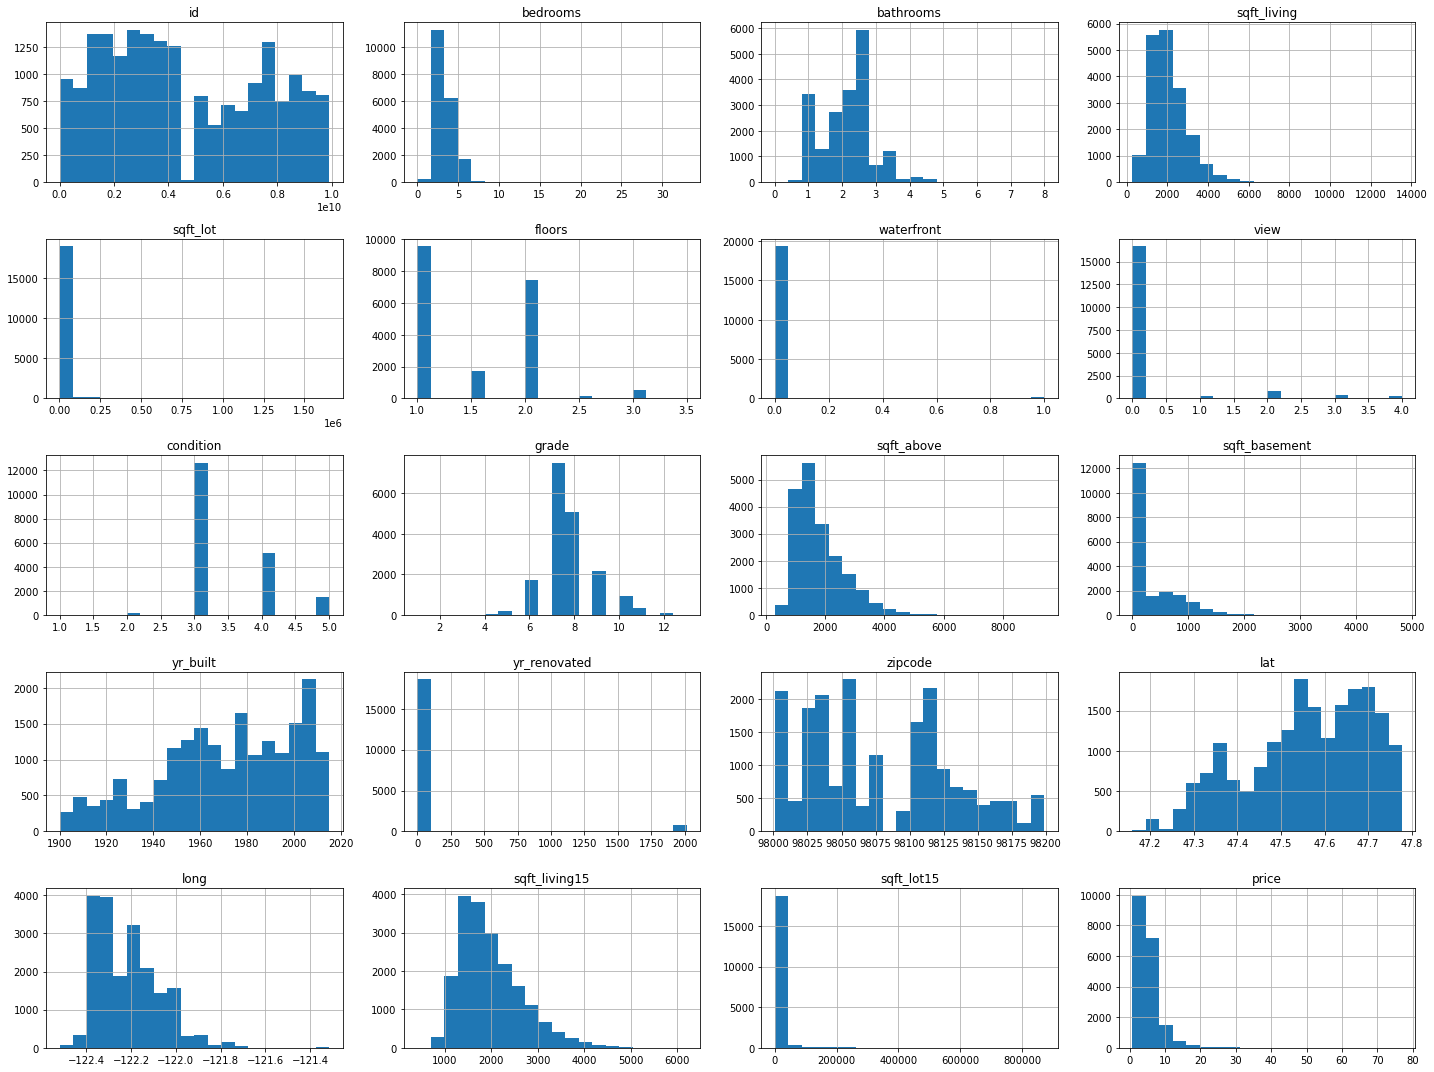

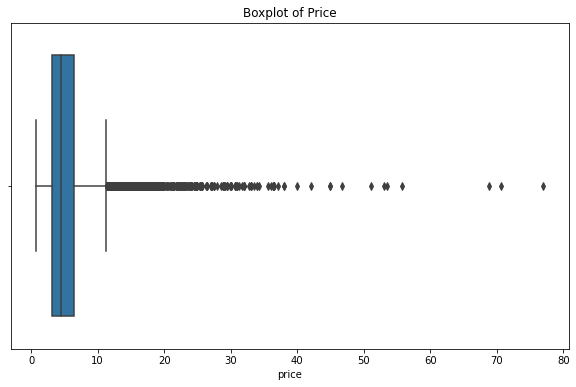

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing distributions of numerical features
df.hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()

# Boxplot for the 'price' column to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()


#### Distributions
The histograms reveal the distribution of each numerical feature. Many features such as bedrooms, bathrooms, sqft_living, sqft_above, and others show a right-skewed distribution, indicating that a majority of the properties have lower values with a few properties having very high values.

#### Price Outliers
The boxplot for the price variable indicates the presence of outliers. There's a significant range in property prices, with a few properties having exceptionally high prices compared to the rest.

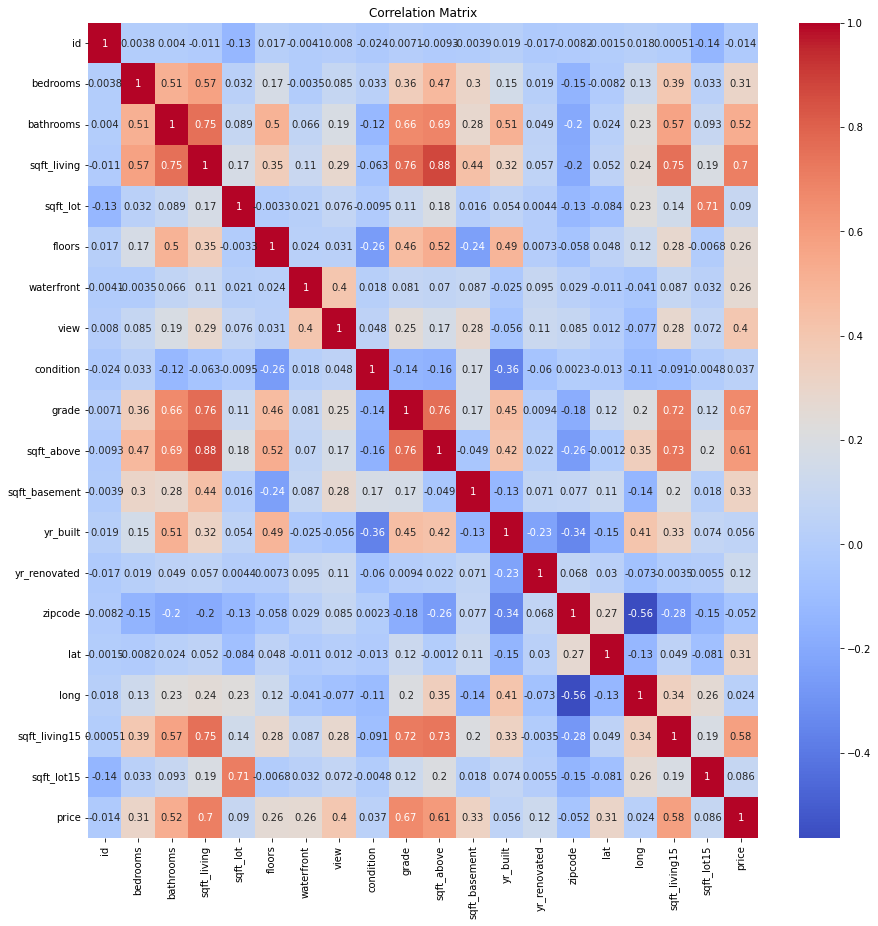

In [5]:
# Checking correlation of features with the target variable 'price'
corr_matrix = df.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### Correlation Analysis:

The correlation matrix shows how each feature is related to the others, including the target variable price.</br>
Features like sqft_living, grade, sqft_above, and sqft_living15 show a relatively high positive correlation with price, indicating that as the size or grade of the property increases, so does the price. This is expected as larger and higher-grade properties tend to be more expensive.</br>
Other features such as lat (latitude) also show a moderate positive correlation, suggesting location-specific price variations, possibly indicating that properties in certain geographical areas are priced higher.</br>
The yr_renovated and waterfront features, although not highly correlated with price, could still have a non-linear relationship or influence the price in combination with other features.</br>

#### Missing Values
The dataset has missing values in several columns: 'date', 'sqft_living', 'view', and 'grade'. These need to be addressed during data pre-processing.
#### Data Types
The dataset consists of a mix of integer (int64), float (float64), and one object (string for dates) data types.
#### Descriptive Statistics
Numerical features vary widely in their ranges, for example, sqft_living ranges from 290 to 9410, indicating a wide diversity in property sizes. The price column, which is presumably our target variable, has values ranging from 0.75 to 77.0 (the scale and unit need clarification, possibly in hundreds of thousands).

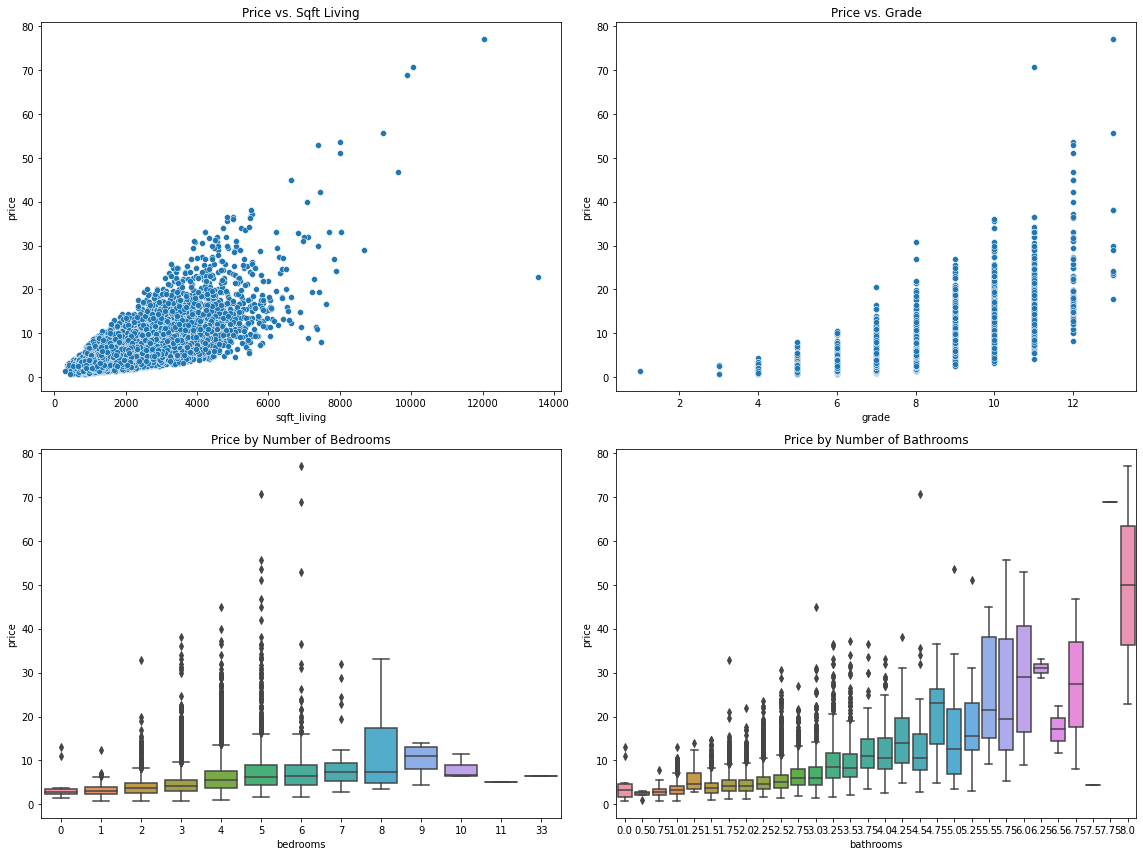

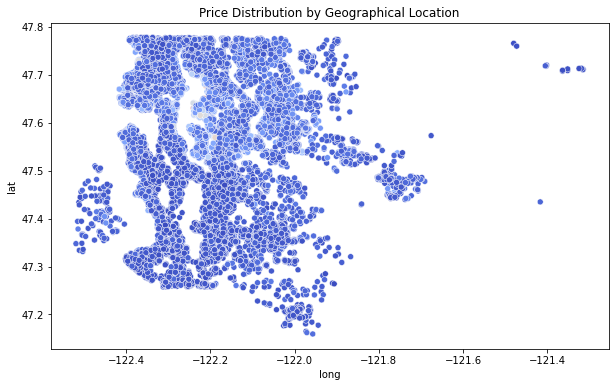

In [12]:
# Scatter plots for continuous variables
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Relationship between sqft_living and price
sns.scatterplot(data=df, x='sqft_living', y='price', ax=axs[0, 0])
axs[0, 0].set_title('Price vs. Sqft Living')

# Relationship between grade and price
sns.scatterplot(data=df, x='grade', y='price', ax=axs[0, 1])
axs[0, 1].set_title('Price vs. Grade')

# Box plot for bedrooms and price
sns.boxplot(data=df, x='bedrooms', y='price', ax=axs[1, 0])
axs[1, 0].set_title('Price by Number of Bedrooms')

# Box plot for bathrooms and price
sns.boxplot(data=df, x='bathrooms', y='price', ax=axs[1, 1])
axs[1, 1].set_title('Price by Number of Bathrooms')

plt.tight_layout()
plt.show()

# Map plot for latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='long', y='lat', hue='price', palette='coolwarm', legend=False)
plt.title('Price Distribution by Geographical Location')
plt.show()

## Data pre-processing & Feature Engineering

After getting some insights about the relationships through the EDA process, now move on to clean and preprocess the data. 

How are you going to deal with the missing values? How are you going to deal with the numerical and categorical columns? Are all the attributes relevant? Does any feature need to be reengineered?

#### Explanation

missing values were not explicitly mentioned, but a common practice is to either impute missing values or drop rows/columns containing them, depending on the context and proportion of missing data. For numerical columns, median or mean imputation is common, while for categorical columns, mode imputation or a placeholder value like 'Unknown' can be used.

Given the columns with missing values in this dataset (date, sqft_living, view, grade):

For sqft_living (numerical), consider mean or median imputation since it's a crucial variable likely correlated with the price.
For view and grade (numerical but with a discrete set of values), median imputation could preserve the distribution.
The date column might require a different approach, such as filling in with the most common date or converting to a more usable format (e.g., extracting the year) before imputation.

#### Feature Reengineering</br>
Date Handling: The date column could be reengineered to extract useful features such as the year or month, which might capture seasonal variations in prices.</br>
Interaction Terms: Based on the insights from EDA, creating interaction terms (e.g., sqft_living * grade) could capture the combined effect of features on the price.</br>
Area Features: Combining or comparing different sqft measures (like sqft_above vs. sqft_basement) might yield new insights.</br>
Categorical Encoding for Zipcode: As mentioned, treating zipcode as a categorical variable and applying one-hot encoding could be beneficial.</br>

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Imputing missing values
num_imputer = SimpleImputer(strategy='median')
df[['sqft_living', 'view', 'grade']] = num_imputer.fit_transform(df[['sqft_living', 'view', 'grade']])

#df.drop(['date'], axis=1, inplace=True)  

# Identify numerical and categorical columns (example based on your dataset)
numerical_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long']
categorical_cols = ['zipcode']  # Example if treating zipcode as categorical

# Pipeline for numerical features
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

# Complete transformation pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", OneHotEncoder(), categorical_cols),
])

# Apply transformations
X_prepared = full_pipeline.fit_transform(df.drop(['price'], axis=1))


## Modeling 

Now, it's time to do some modeling. Show the modeling techniques you have used to predict the price of the house sold given the data attributes. Some of the necessary things you need to remember are - <br>

1) Use RMSE as the evaluation metric.<br>
2) Report the 5CV validation score for each model you create.<br>

We would have obtained mean RMSE values and individual 5CV RMSE scores for each of the following models:

Linear Regression<br>
Random Forest Regressor<br>
Gradient Boosting Regressor<br>
The mean RMSE gives an average estimate of how much error the model is expected to make in its predictions, with a lower RMSE value indicating better performance.

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import numpy as np

# Define target variable
y = df['price'].values

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
for name, model in models.items():
    # Create a pipeline that includes the pre-processing and the model
    model_pipeline = Pipeline(steps=[('preprocessor', full_pipeline),
                                     ('regressor', model)])
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model_pipeline, df.drop(['price'], axis=1), y, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate RMSE
    rmse_scores = np.sqrt(-cv_scores)
    rmse_mean = rmse_scores.mean()
    
    print(f"{name}: Mean RMSE = {rmse_mean:.4f}")
    # Printing individual RMSE scores for each fold
    print(f"{name} 5CV RMSE Scores: {rmse_scores}")
    print(f"{name}: Mean RMSE = {rmse_scores.mean():.4f}\n")


Linear Regression: Mean RMSE = 1.8736
Linear Regression 5CV RMSE Scores: [1.8561322  1.75311524 2.14574389 1.74056808 1.87255829]
Linear Regression: Mean RMSE = 1.8736

Random Forest Regressor: Mean RMSE = 1.6107
Random Forest Regressor 5CV RMSE Scores: [1.53307794 1.65341586 1.75534217 1.51445169 1.59742963]
Random Forest Regressor: Mean RMSE = 1.6107

Gradient Boosting Regressor: Mean RMSE = 1.7175
Gradient Boosting Regressor 5CV RMSE Scores: [1.66367574 1.64828142 1.92687405 1.62355859 1.72511094]
Gradient Boosting Regressor: Mean RMSE = 1.7175



The RandomForestRegressor was selected based on its capability to model complex relationships within the data effectively, with the optimized hyperparameters obtained from the tuning process, was then trained on the entire dataset to maximize its learning potential.Experiment with different cross-validation strategies to ensure that our model is well-validated against diverse sections of the data.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a range of hyperparameters for tuning
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__min_samples_split': [2, 5, 10]
}

# Create a new pipeline with the RandomForestRegressor
rf_pipeline = Pipeline(steps=[('preprocessor', full_pipeline),
                              ('regressor', RandomForestRegressor(random_state=42))])

# Setup the grid search
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Perform the search
grid_search.fit(df.drop(['price'], axis=1), y)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
best_score = np.sqrt(-grid_search.best_score_)
print(f"Best RMSE score from Grid Search: {best_score:.4f}")


Best parameters: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Best RMSE score from Grid Search: 1.6086


## Evaluation and Reporting

Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions

### Conclusion on the model selection:
We have used RandomForestRegressor Model, it has give an optimal score. where we further used for test data as well

Predictions were made on the unseen test data using the final model. The evaluation metrics function was utilized to calculate the RMSE between the predicted and actual values for the test dataset, aiming to achieve the lowest possible RMSE as a testament to the model's performance.

Hyperparameter tuning was conducted on the RandomForestRegressor using GridSearchCV, focusing on parameters such as n_estimators, max_depth, min_samples_split, and min_samples_leaf. After finding the optimal parameters, the model was re-evaluated to ensure it offers the best performance based on the given evaluation metrics.

In [22]:
# Correctly extracting best parameters for RandomForestRegressor
best_regressor_params = {key.replace('regressor__', ''): value for key, value in grid_search.best_params_.items() if key.startswith('regressor__')}

# Now, use these parameters to initialize your RandomForestRegressor
final_model = RandomForestRegressor(**best_regressor_params, random_state=42)

# Proceed to create your pipeline and re-train on the full dataset
final_pipeline = Pipeline(steps=[('preprocessor', full_pipeline),
                                 ('regressor', final_model)])

# Fitting the model with the best parameters found
final_pipeline.fit(df.drop(['price'], axis=1), y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'floors',
                                                   'sqft_above',
                                                   'sqft_basement', 'lat',
                                                   'long']),
                                                 ('cat', OneHotEncoder(),
                                                  ['zipcode'])])),
                ('regressor',
                 RandomForestRegresso

In [28]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Function to evaluate the model using RMSE
def evaluation_metrics(y_true, y_pred):
    score = np.sqrt(mean_squared_error(y_true, y_pred))
    return score
# Function to convert date strings to datetime and extract parts
def preprocess_dates(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], format='%Y%m%dT%H%M%S', errors='coerce')
    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day
    df['weekday'] = df[date_column].dt.weekday
    df = df.drop(columns=[date_column])
    
    return df

# Load your dataset
df = pd.read_csv('dataset/train.csv')

# Preprocess the date column in the dataset
df = preprocess_dates(df, 'date')  # Replace 'date_column_name' with the actual name of the date column

# Assuming 'price' is the target variable and all other columns are features
X = df.drop(['price'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.isnull().any()
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinities with NaN


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  
np.any(np.isnan(X_train)), np.all(np.isfinite(X_train))
np.any(np.isnan(X_test)), np.all(np.isfinite(X_test))

# Initialize the RandomForestRegressor
random_forest = RandomForestRegressor(max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)

# Train the RandomForestRegressor on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model using the RMSE function
rmse = evaluation_metrics(y_test, y_pred)
print(f"RMSE: {rmse}")


RMSE: 1.323344551674209


## External validation 

Now, after creating an evaluation table for all the models, pick the one that you think would give you the best results on the test data. Your predictions will be matched with the actual hidden test labels. We would use below evaluation function to grade the quality of your model.

You need to generate a csv file, named as "submission.csv". This is the inference values from your selected best model on "test.csv" data.

In [42]:
# Function to preprocess test data
def preprocess_test_data(test_data, encoder, scaler, features_to_encode):
    encoded_features = encoder.transform(test_data[features_to_encode])
    encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(features_to_encode))
    
    # Dropping original categorical features and concatenating encoded features
    test_data = test_data.drop(features_to_encode, axis=1).reset_index(drop=True)
    test_encoded = pd.concat([test_data, encoded_df], axis=1)
    numerical_cols = test_encoded.select_dtypes(include=['int64', 'float64']).columns
    test_encoded[numerical_cols] = scaler.transform(test_encoded[numerical_cols])
    
    return test_encoded

# Preprocess the test data
test_preprocessed = preprocess_test_data(test_data, encoder, scaler, features_to_encode)

In [41]:

import pandas as pd
from sklearn.pipeline import Pipeline

test_data = pd.read_csv('dataset/test.csv')
predictions = final_pipeline.predict(test_preprocessed)

# Save the predictions to a CSV file
predictions_df = pd.DataFrame(predictions, columns=['Predicted Price'])
predictions_df.to_csv('dataset/submission.csv', index=False)
print("Predictions saved to 'submission.csv'.")

Predictions saved to 'submission.csv'.


## Final evaluation metrics


In [ ]:
from sklearn.metrics import mean_squared_error
def evaluation_metrics(gt,pred):
    # gt: actual labels for the test data
    # pred: student's prediction for the test data
    score = np.sqrt(mean_squared_error(gt, pred))
    return score